<a href="https://colab.research.google.com/github/baysatriow/mugiwara-library/blob/main/MLQ_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
import pandas as pd

# Load the CSV files
member_df = pd.read_csv("https://raw.githubusercontent.com/ZerXXX0/sales-prediction/refs/heads/main/dataset/member_data.csv")
label_df = pd.read_csv("https://raw.githubusercontent.com/ZerXXX0/sales-prediction/refs/heads/main/dataset/train_label_data.csv")
transaction_df = pd.read_csv("https://raw.githubusercontent.com/ZerXXX0/sales-prediction/refs/heads/main/dataset/train_transaction_data.csv")

# Merge transaction data with member data
transaction_member_df = pd.merge(transaction_df, member_df, on="MemberID", how="left")

# Merge the above result with label data
final_df = pd.merge(transaction_member_df, label_df, on="MemberID", how="left")

# Save the final merged DataFrame to a CSV file
final_df.to_csv("combined_member_transaction_label.csv", index=False)

print("CSV file saved as combined_member_transaction_label.csv")


CSV file saved as combined_member_transaction_label.csv


In [ ]:
df = pd.read_csv("/content/combined_member_transaction_label.csv")

In [ ]:
df.head()

,TransactionID,MemberID,Source,FK_PRODUCT_ID,FK_PROD_GRAM_ID,Qty,PricePerUnit,TransactionDatetime,JoinDate,DateOfBirth,City,NoOfChild,EldestKidDOB,YoungestKidDOB,next_buy
0,ffd6c035bef03a2c386caf2552148fb2402b0b24,7ef72aa51aecb701dc5c4074480fcdf6,ELANG,27,52,1,NaN,2020-07-01 07:41:00 UTC,2019-12-24,NaN,BEKASI,1,2017-07-31,2017-07-31,0
1,4fadf10aff7e250cc8d63badeaefdf383c0e1c13,577f1b9a093c2cec6398b1118f5d99ab,ALFAMART,22,39,1,290000.0,2020-07-01 07:24:00 UTC,2019-08-29,NaN,JAMBI,2,2017-03-08,2019-01-27,0
2,7299df1aaf47b52017f58dd8e59df1fe37072670,e2ee74f248a74ed886a22f14348fbafd,EKTONG,22,39,1,263500.0,2020-07-01 09:13:00 UTC,2018-06-19,NaN,MAKASAR,2,2017-06-04,2019-04-10,0
3,22dae0e1e8bb87601eabd712721bd249739bc620,cefa8ef7469a8b4e6df3f745d4905000,CITRA,27,52,3,145000.0,2020-07-01 08:28:00 UTC,2019-05-06,NaN,SIDOARJO,1,2016-11-16,2016-11-16,0
4,6a744d5d79e09b0c1646e604db1c4ec65eff73d7,5eecda17ddf06ed9d79f298b13f84785,INDOMARET,27,52,1,165900.0,2020-07-01 07:02:00 UTC,2020-05-05,NaN,SUKABUMI,1,2018-05-22,2018-05-22,0


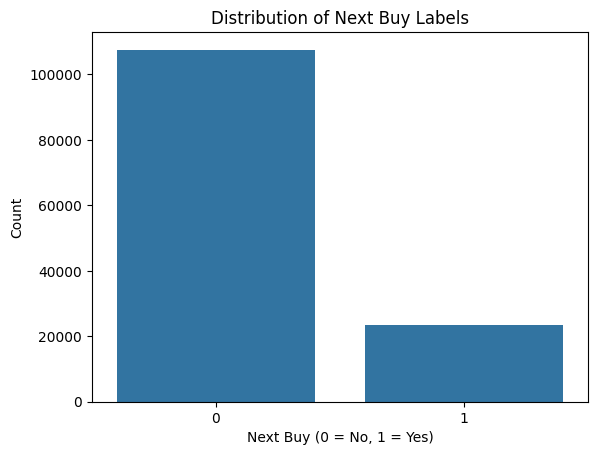

In [ ]:
sns.countplot(data=df, x='next_buy')
plt.title('Distribution of Next Buy Labels')
plt.xlabel('Next Buy (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130854 entries, 0 to 130853
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TransactionID        130854 non-null  object 
 1   MemberID             130854 non-null  object 
 2   Source               130854 non-null  object 
 3   FK_PRODUCT_ID        130854 non-null  int64  
 4   FK_PROD_GRAM_ID      130854 non-null  int64  
 5   Qty                  130854 non-null  int64  
 6   PricePerUnit         111681 non-null  float64
 7   TransactionDatetime  130854 non-null  object 
 8   JoinDate             130854 non-null  object 
 9   DateOfBirth          6692 non-null    object 
 10  City                 130854 non-null  object 
 11  NoOfChild            130854 non-null  int64  
 12  EldestKidDOB         130854 non-null  object 
 13  YoungestKidDOB       130854 non-null  object 
 14  next_buy             130854 non-null  int64  
dtypes: float64(1), in

Preprocessing

In [ ]:
pip install category_encoders

In [ ]:
import category_encoders as ce

# Define encoder
encoder = ce.TargetEncoder(cols=['Source'])

# Fit encoder on training data only
encoder.fit(df['Source'], df['next_buy'])

# Transform both training and validation using the encoder
df['Source_encoded'] = encoder.transform(df['Source'])

In [ ]:
import category_encoders as ce

# Define encoder
encoder = ce.TargetEncoder(cols=['City'])

# Fit encoder on training data only
encoder.fit(df['City'], df['next_buy'])

# Transform both training and validation using the encoder
df['City_encoded'] = encoder.transform(df['City'])

In [ ]:
# Drop the 'MemberID' column as it is not needed for modeling
df = df.drop('DateOfBirth', axis=1)
df = df.drop('TransactionDatetime', axis=1)
df = df.drop('JoinDate', axis=1)
df = df.drop('EldestKidDOB', axis=1)
df = df.drop('YoungestKidDOB', axis=1)

In [ ]:
df = df.drop('Source', axis=1)
df = df.drop('City', axis=1)

In [ ]:
# prompt: make next_buy as the last column instead of YoungestKidDOB_normalized

# Move 'next_buy' to the last column
next_buy_column = df.pop('next_buy')
df['next_buy'] = next_buy_column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130854 entries, 0 to 130853
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    130854 non-null  object 
 1   MemberID         130854 non-null  object 
 2   FK_PRODUCT_ID    130854 non-null  int64  
 3   FK_PROD_GRAM_ID  130854 non-null  int64  
 4   Qty              130854 non-null  int64  
 5   PricePerUnit     111681 non-null  float64
 6   NoOfChild        130854 non-null  int64  
 7   Source_encoded   130854 non-null  float64
 8   City_encoded     130854 non-null  float64
 9   next_buy         130854 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 10.0+ MB


Visualization after Preprocessing

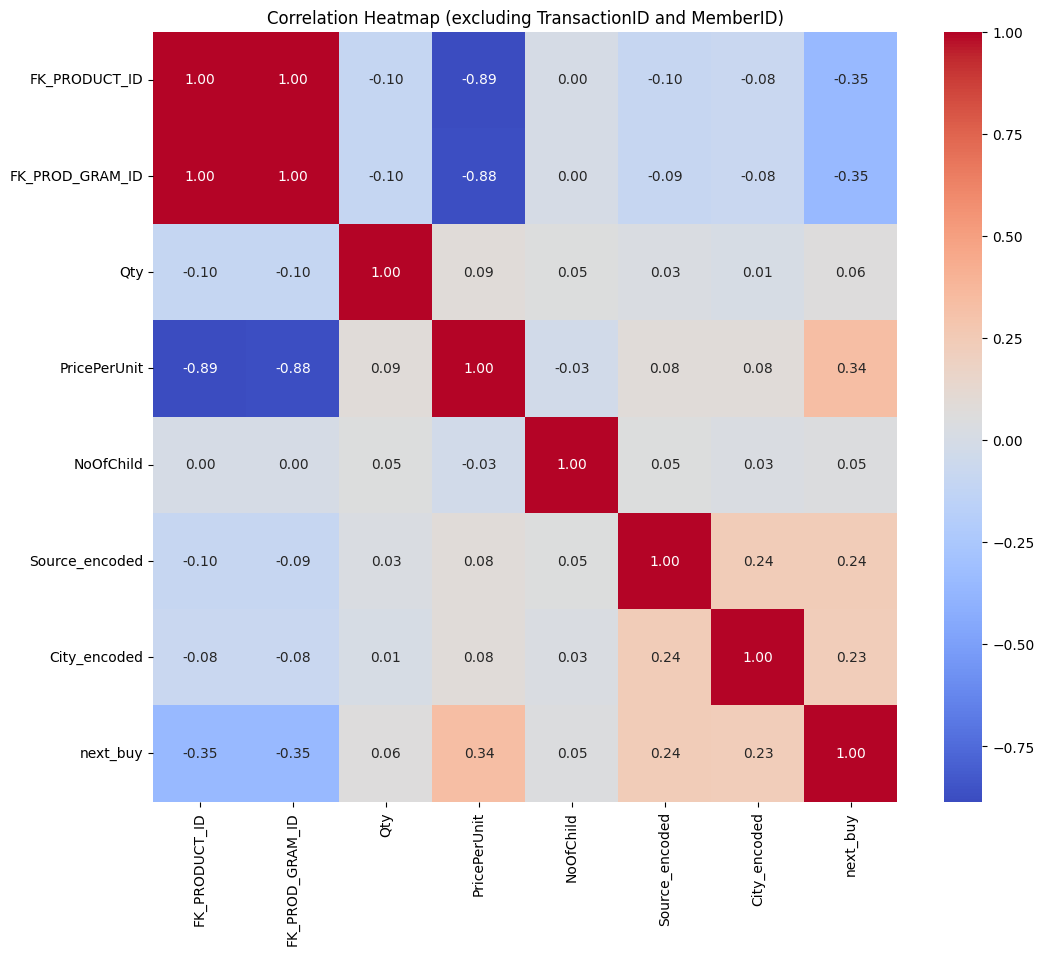

In [ ]:
# prompt: make correlation heatmap for each column, except TransactionID and MemberID

import matplotlib.pyplot as plt
# Calculate the correlation matrix, excluding 'TransactionID' and 'MemberID'
correlation_matrix = df.drop(['TransactionID', 'MemberID'], axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (excluding TransactionID and MemberID)')
plt.show()

In [ ]:
df.to_csv("new_train.csv")

Machine Learning

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split # <-- Import train_test_split

# --- 1. Load Data ---
print("🔄 Loading data...")
try:
    train_df = pd.read_csv('new_train.csv')
    test_df = pd.read_csv('https://raw.githubusercontent.com/ZerXXX0/sales-prediction/refs/heads/main/dataset/test_transaction_data.csv')
    print("✅ Data loaded successfully!")
except FileNotFoundError as e:
    print(f"❌ Error loading data: {e}")
    exit()

In [ ]:
# --- 2. Feature Engineering ---
print("\n🔄 Performing feature engineering...")

# Store test identifiers to merge back later
test_ids = test_df[['TransactionID', 'MemberID']]

# For robust feature creation, combine train and test data temporarily
train_df['is_train'] = 1
test_df['is_train'] = 0
combined_df = pd.concat([train_df, test_df], ignore_index=True, sort=False)

# --- DATETIME FEATURE ENGINEERING ---
if 'TransactionDatetime' in combined_df.columns:
    print("  - Processing 'TransactionDatetime' column...")
    combined_df['TransactionDatetime'] = pd.to_datetime(combined_df['TransactionDatetime'])
    combined_df['dt_year'] = combined_df['TransactionDatetime'].dt.year
    combined_df['dt_month'] = combined_df['TransactionDatetime'].dt.month
    combined_df['dt_day'] = combined_df['TransactionDatetime'].dt.day
    combined_df['dt_dayofweek'] = combined_df['TransactionDatetime'].dt.dayofweek
    combined_df['dt_hour'] = combined_df['TransactionDatetime'].dt.hour
    print("    ...created year, month, day, dayofweek, and hour features.")
else:
    print("  - 'TransactionDatetime' column not found, skipping datetime processing.")

# --- AGGREGATE FEATURE ENGINEERING ---
print("  - Creating aggregate features for 'MemberID'...")
member_agg = combined_df.groupby('MemberID').agg(
    member_avg_price=('PricePerUnit', 'mean'),
    member_total_qty=('Qty', 'sum'),
    member_transaction_count=('TransactionID', 'nunique'),
    member_unique_products=('FK_PRODUCT_ID', 'nunique')
).reset_index()
combined_df = pd.merge(combined_df, member_agg, on='MemberID', how='left')

In [ ]:
# --- 3. Data Preprocessing ---
print("  - Handling other categorical features...")
for col in ['Source', 'City', 'Source_encoded', 'City_encoded']:
    if col in combined_df.columns and combined_df[col].dtype == 'object':
        combined_df[col] = combined_df[col].astype('category')
        print(f"    ...converted '{col}' to category type.")

# Separate back into training and testing sets
train_df = combined_df[combined_df['is_train'] == 1].copy()
test_df = combined_df[combined_df['is_train'] == 0].copy()

# Drop the helper column
train_df.drop('is_train', axis=1, inplace=True)
test_df.drop('is_train', axis=1, inplace=True)

print("✅ Feature engineering and preprocessing complete!")

In [ ]:
# --- 4. Model Training ---
print("\n🚀 Training LightGBM classification model...")

TARGET = 'next_buy'
features = [col for col in train_df.columns if col not in [
    'TransactionID', 'MemberID', TARGET, 'TransactionDatetime'
]]

X = train_df[features]
y = train_df[TARGET]
X_test = test_df[features]

# --- FIX: CREATE A VALIDATION SET FOR EARLY STOPPING ---
# We split the training data (X, y) into a new training set and a validation set.
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,      # 20% of the data will be used for validation
    random_state=42,
    stratify=y          # Ensures the validation set has the same class distribution as the training set
)
print(f"  - Training data shape: {X_train.shape}")
print(f"  - Validation data shape: {X_val.shape}")


# Initialize the LightGBM classifier
lgbm = lgb.LGBMClassifier(objective='binary',
                          metric='auc',
                          random_state=42,
                          n_estimators=1000,
                          learning_rate=0.05,
                          num_leaves=31)

# --- FIX: PASS THE VALIDATION SET TO .fit() ---
# The `eval_set` parameter tells the model which data to use for early stopping.
lgbm.fit(X_train, y_train,
         eval_set=[(X_val, y_val)],
         eval_metric='auc',
         callbacks=[lgb.early_stopping(100, verbose=True)])

print("✅ Model training complete!")


In [ ]:
# --- 5. Prediction and Submission ---
print("\n🔮 Generating predictions on the full test set...")

predictions_proba = lgbm.predict_proba(X_test)[:, 1]

submission_df = test_ids.copy()
submission_df['next_buy_probability'] = predictions_proba
submission_df['next_buy_prediction'] = (predictions_proba > 0.5).astype(int)

submission_df.to_csv('predictions_with_ids.csv', index=False)

print("✅ Submission file 'predictions_with_ids.csv' created successfully!")
print("\n--- Predictions Head ---")
print(submission_df.head())


🔄 Loading data...
✅ Data loaded successfully!

🔄 Performing feature engineering...
  - Processing 'TransactionDatetime' column...
    ...created year, month, day, dayofweek, and hour features.
  - Creating aggregate features for 'MemberID'...
  - Handling other categorical features...
    ...converted 'Source' to category type.
✅ Feature engineering and preprocessing complete!

🚀 Training LightGBM classification model...
  - Training data shape: (104683, 17)
  - Validation data shape: (26171, 17)
[LightGBM] [Info] Number of positive: 18635, number of negative: 86048
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1150
[LightGBM] [Info] Number of data points in the train set: 104683, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.178014 -> initscore=-1.

In [ ]:
submission_df = submission_df.drop('TransactionID', axis=1)
submission_df = submission_df.drop('next_buy_probability', axis=1)

In [ ]:
submission_df.head()

,MemberID,next_buy_prediction
0,c2a630e3d0dc77dac0f63424a9ae1438,0
1,3ecf7484c08418953e967a20de37051b,0
2,97bbd6c99a862f20657d9b2b1c77b2c8,0
3,3ce072ff9c6f2f4b7c95dbc08324a24d,0
4,ab0b0de2a1c85a40b5d58644aef745c0,0


In [ ]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21098 entries, 0 to 21097
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   MemberID             21098 non-null  object
 1   next_buy_prediction  21098 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 329.8+ KB


In [ ]:
# prompt: rename a column next_buy_prediction to next_buy

submission_df = submission_df.rename(columns={'next_buy_prediction': 'next_buy'})

In [ ]:
submission_df.head()

,MemberID,next_buy
0,c2a630e3d0dc77dac0f63424a9ae1438,0
1,3ecf7484c08418953e967a20de37051b,0
2,97bbd6c99a862f20657d9b2b1c77b2c8,0
3,3ce072ff9c6f2f4b7c95dbc08324a24d,0
4,ab0b0de2a1c85a40b5d58644aef745c0,0


Matching the format with submission template

In [ ]:
submit_df = pd.read_csv("https://raw.githubusercontent.com/ZerXXX0/sales-prediction/refs/heads/main/dataset/sample_submission.csv")

In [ ]:
# First, create a new dataframe from submission_df with duplicate MemberIDs removed.
# We keep the 'last' entry for each member.
submission_df_unique = submission_df.drop_duplicates(subset=['MemberID'], keep='last')

# Now, create the lookup map from this de-duplicated dataframe.
# This will succeed because the 'MemberID' index is now unique.
next_buy_lookup = submission_df_unique.set_index('MemberID')['next_buy']

# Proceed with the map operation as before. This will now work correctly.
submit_df['next_buy'] = submit_df['MemberID'].map(next_buy_lookup)

In [ ]:
submit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6381 entries, 0 to 6380
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MemberID  6381 non-null   object
 1   next_buy  6381 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 99.8+ KB


In [ ]:
submit_df.to_csv('submission.csv', index=False)